# STAT 207 Homework 10 [25 points]

## Logistic Regression, Classifiers, & Project 3

Due: Friday, April 19, end of day (11:59 pm CT)

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Case Study: Heart Disease

Can we identify patients who have heart disease based on other patient characteristics?

We will use the following information about patients:

- **age**: age
- **sex**: sex, 1 = male, 0 = female
- **cp**: chest pain type, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
- **trestbps**: resting blood pressure (in mm Hg)
- **chol**: serum cholesterol in mg/dl
- **fbs**: whether the fasting blood sugar is above 120 mg/dl (1 = true, 0 = false)
- **restecg**: resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes, 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- **ca**: number of major vessels (0-3) colored by flouroscopy (for calcification of vessels)
- **thal**: number of nuclear stress test (3 = normal, 6 = fixed defect, 7 = reversible defect)
- **num**: target number of progression of heart disease (1+ indicates at least 50% narrowing
- **y**: our target, generated below, for the presence of heart disease (1 = present, 0 = absent)

The data originally came from https://archive.ics.uci.edu/dataset/45/heart+disease.

Run the code in the cell below to read in the data for this document.  The data is saved as `df` with this code.  

In [2]:
df = pd.read_csv('processed_cleveland.csv', na_values = ['?'])
df = df.dropna()
df['y'] = 1 * (df['num'] > 0)
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})
df['cp'] = df['cp'].replace({1: 'typical', 2:'atypical', 3: 'non-anginal', 4: 'asymptomatic'})
df['fbs'] = df['fbs'].replace({1: 'high', 0: 'typical'})
df['restecg'] = df['restecg'].replace({0: 'normal', 1:'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
df['exang'] = df['exang'].replace({0: 'no', 1: 'yes'})
df['slope'] = df['slope'].replace({1:'upsloping', 2:'flat', 3:'downsloping'})
df['thal'] = df['thal'].replace({3: 'normal', 6: 'fixed defect', 7:'reversible defect'})

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,y
0,63,male,typical,145,233,high,left ventricular hypertrophy,150,no,2.3,downsloping,0.0,fixed defect,0,0
1,67,male,asymptomatic,160,286,typical,left ventricular hypertrophy,108,yes,1.5,flat,3.0,normal,2,1
2,67,male,asymptomatic,120,229,typical,left ventricular hypertrophy,129,yes,2.6,flat,2.0,reversible defect,1,1
3,37,male,non-anginal,130,250,typical,normal,187,no,3.5,downsloping,0.0,normal,0,0
4,41,female,atypical,130,204,typical,left ventricular hypertrophy,172,no,1.4,upsloping,0.0,normal,0,0


## 0. Prepare the Data [0.5 points]

Split the data into a training and a test data, using 20% as our test data and a random state of 1103.  We will use our training data exclusively for the first three questions of the assignment.  We won't turn to the test data until the third question.

In [4]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1103)

## 1. Understand a Logistic Regression Model [2 points]

We know that we would like to predict the presence of heart disease (y).  First, we'll consider a simple model that uses age to predict the presence of heart disease.

**a)** Below, fit the model predicting the presence of heart disease from age.  Print the summary of the model.

In [7]:
age_model = smf.logit("y ~ age", data = df_train).fit()
age_model.summary()

Optimization terminated successfully.
         Current function value: 0.671042
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                 0.02828
Time:                        09:14:24   Log-Likelihood:                -159.04
converged:                       True   LL-Null:                       -163.67
Covariance Type:            nonrobust   LLR p-value:                  0.002345
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5826      0.836     -3.089      0.002      -4.221      -0.944
age            0.0447      0.015      2.964      0.003       0.015       0.074
==============================================================================
"""

**b)** Generate the fitted vs. deviance residual plot for this model.

<Axes: >

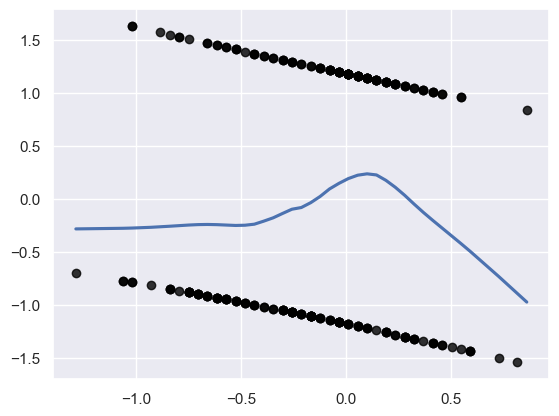

In [16]:
sns.regplot(y = age_model.resid_dev, x = age_model.fittedvalues, color="black", line_kws={"color":"b"}, lowess=True)

## 2. Fitting a More Complex Model [1 point]

We'd like to explore how effective advanced tests are at recognizing the risk of heart disease.  We'll fit a second model predicting y from age, sex, restecg, thalach, exang, oldpeak, slope, ca, and thal.  Be sure to print the output of your model below.

In [18]:
comp_model = smf.logit("y ~ age + sex + restecg + thalach + exang + oldpeak + slope + ca + thal", data = df_train).fit()
comp_model.summary()

Optimization terminated successfully.
         Current function value: 0.391538
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.4330
Time:                        09:26:22   Log-Likelihood:                -92.794
converged:                       True   LL-Null:                       -163.67
Covariance Type:            nonrobust   LLR p-value:                 2.664e-24
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.7957      3.151      0.253      0.801      -5.380       6.972
sex[T.male]                                 0.9081      0.482      1.885      0.059      -0.036       1.852
restecg[T.left ventricular hypertrophy]     0.4840      1.891      0.256      0.798      -3.223       4.190
restecg[T.normal]                          -0.1737      1.892     -0.092      0.927      -3.881       3.534
exang[T.yes]                                1.1745      0.424      2.769      0.006       0.343       2.006
slope[T.flat]                               0.4186      0.782      0.535      0.592      -1.114       1.951
slope[T.upsloping]                         -0.5163      0.871     -0.593      0.553      -2.224       1.191
thal[T.normal]                              0.0878      0.784      0.112      0.911      -1.448       1.624
thal[T.reversible defect]                   1.4645      0.754      1.942      0.052      -0.013       2.942
age                                        -0.0112      0.024     -0.466      0.641      -0.058       0.036
thalach                                    -0.0193      0.010     -1.893      0.058      -0.039       0.001
oldpeak                                     0.1944      0.229      0.850      0.395      -0.254       0.642
ca                                          1.1083      0.257      4.308      0.000       0.604       1.613
===========================================================================================================
"""

## 3. Build a Classifier [1.5 points]

Using the model from Question 2, build a classifier to our training data using a predictive probability threshold of 0.75.  Then, generate a confusion matrix from this model.

In [26]:
df_train['predictive_prob'] = comp_model.predict(df_train)
df_train['y_hat'] = 1*(df_train['predictive_prob']>=0.75)
df_train[['y', 'y_hat', 'predictive_prob']]

,y,y_hat,predictive_prob
146,1,1,0.989611
114,1,1,0.782307
299,1,1,0.942985
295,0,0,0.053444
130,0,0,0.669076
...,...,...,...
36,1,1,0.949381
65,1,1,0.989961
173,0,0,0.153439
39,0,0,0.518953


In [25]:
tn, fp, fn, tp =confusion_matrix(y_true = df_train['y'], y_pred = df_train['y_hat']).ravel()
(tn, fp, fn, tp)

(120, 7, 43, 67)

## 4. Test Data [1 point]

Finally, apply your logistic regression model from **Question 2** to your test data.  Calculate the predicted probabilities on your test data.

In [30]:
df_test['pred_prob'] = comp_model.predict(df_test)
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,y,pred_prob
203,64,female,non-anginal,140,313,typical,normal,133,no,0.2,upsloping,0.0,reversible defect,0,0,0.157546
77,51,female,non-anginal,140,308,typical,left ventricular hypertrophy,142,no,1.5,upsloping,1.0,normal,0,0,0.256675
31,60,male,asymptomatic,117,230,high,normal,160,yes,1.4,upsloping,2.0,reversible defect,2,1,0.915184
259,57,male,atypical,124,261,typical,normal,141,no,0.3,upsloping,0.0,reversible defect,1,1,0.304594
27,66,female,typical,150,226,typical,normal,114,no,2.6,downsloping,0.0,normal,0,0,0.151156


## 5. Starting the Project [4 points]

The last four points on this assignment will be earned by starting on the project.  These points serve as an incentive for starting the project early.  This question will be graded for completion rather than correctness, so no feedback will be given on your initial submissions for the project.  Note that if you are completing the project as a group, you may all submit the same code for this question.  However, each of your should submit that code on your own homework assignment and post it yourself to GitHub.

Be sure that you put a copy of your project data into this homework folder, so your code will run.

You may modify your project after you submit the portions of this assignment.

**a)** Read in your data.  Then, split your data into a testing and training set.

**b)** Fit a logistic model to your data, using at least three predictor variables.  Print the summary of this model.

**c)** Generate an ROC curve for the logistic regression model fit in **5b**.

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 10 Canvas Assignment to submit your notebook to GitHub.